# Question: Which studios are [Worthy Rivals](https://ideas.ted.com/how-having-the-right-kind-of-rival-can-help-you-thrive-in-a-changing-world/)?


Who are the major players in the current movie industry? We'll look for insight into this question by examining the Top 100 recent movies (released in the last 5 years) and see which studios released the top grossing movies. These are the major player to view as worthy rivals.

---

# Data Understanding

I used data from [Box Office Mojo](https://www.boxofficemojo.com/), an online box office reporting and analysis service, to investigate this question. 

* bom.movie_gross.csv.gz
    * Contains title, studio, release year, domestic, and foreign gross.


In [6]:
import pandas as pd
import numpy as np

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
bom_movie_gross_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000.00",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",664300000,2010
3,Inception,WB,"292,600,000.00",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000.00",513900000,2010


In [8]:
print(bom_movie_gross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


# Data Preparation

__Data cleaning and conversion details:__

* No duplicates.

* title had no NAs.

* studio 5 had NaNs. Replace them with "UNKNOWN" for unknown

* domestic_gross has NaNs. 3359 populated out of 3387. Will select a subset to use

* foreign_gross is str and needs to be converted to float

* foreign_gross has NaNs.  2037 populated out of 3387.  Will select a subset to use

* year has no NaNs

* Creating a worldwide_gross column where there are values for both domestic_gross and foreign_gross. This is the measure I'm interested in. 

In [9]:
# check for duplicates
bom_dups = bom_movie_gross_df[bom_movie_gross_df.duplicated()]
print(len(bom_dups))

0


In [10]:
# fill NaNs 
bom_movie_gross_df['studio'].fillna('UNKNOWN', inplace=True)

In [11]:
# convert to float so we can aggregate
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)

In [15]:
print(bom_movie_gross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB
None


Creating a new dataframe that __only__ includes movies with values for both domestic and foreign gross so we can calculate worldwide gross.  

Results in 2009 movies released during 2010-2018.

In [16]:
bom_ww_gross_df = bom_movie_gross_df.loc[bom_movie_gross_df['domestic_gross'].notnull() & bom_movie_gross_df['foreign_gross'].notnull()]
bom_ww_gross_df['worldwide_gross'] = bom_ww_gross_df['domestic_gross'] + bom_ww_gross_df['foreign_gross']

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The min for domestic_gross and foreign_gross are very small but I'm leaving them in as (1) they may be valid values (really poor performace or release date at the very end of 2018) and (2) I am only interested in getting the top grossing movies to answer this question. 

The max for domestic_gross and foreign_gross are very large but to be expected as valid movie blockbuster amounts.

In [18]:
print(bom_ww_gross_df.describe())

       domestic_gross  foreign_gross     year  worldwide_gross
count        2,009.00       2,009.00 2,009.00         2,009.00
mean    46,973,114.38  75,718,219.20 2,013.50   122,691,333.58
std     81,599,661.11 138,129,649.08     2.60   207,487,031.92
min            400.00         600.00 2,010.00         4,900.00
25%        665,000.00   3,900,000.00 2,011.00     8,141,000.00
50%     16,500,000.00  19,300,000.00 2,013.00    42,300,000.00
75%     56,000,000.00  75,900,000.00 2,016.00   133,700,000.00
max    936,700,000.00 960,500,000.00 2,018.00 1,518,900,000.00


In [17]:
print(bom_ww_gross_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2009 non-null   object 
 1   studio           2009 non-null   object 
 2   domestic_gross   2009 non-null   float64
 3   foreign_gross    2009 non-null   float64
 4   year             2009 non-null   int64  
 5   worldwide_gross  2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.9+ KB
None


In [20]:
bom_ww_gross_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [3]:
### SAVE IT
#bom_ww_gross_df.to_csv('../cleanedData/bom.worldwide_gross.csv')

# Exploratory Data Analysis

I want to hone in on more recent trends rather than use data that is almost a decade old (loaded data set has date span of 2010-2018).  To look for studios that are currently peforming well, I create a dataframe with recent movies (released in the last 5 years).

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
# get the average gross for recent movies (released in the last 5 years of this dataset's timeframe)
bom_ww_gross_recent_df = bom_ww_gross_df.loc[bom_ww_gross_df['year'].isin([2018, 2017, 2016, 2015, 2014])]

print(bom_ww_gross_recent_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 1477 to 3353
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            966 non-null    object 
 1   studio           966 non-null    object 
 2   domestic_gross   966 non-null    float64
 3   foreign_gross    966 non-null    float64
 4   year             966 non-null    int64  
 5   worldwide_gross  966 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 52.8+ KB
None


In [24]:
print(bom_ww_gross_recent_df.describe())

       domestic_gross  foreign_gross     year  worldwide_gross
count          966.00         966.00   966.00           966.00
mean    54,910,633.84  91,610,597.30 2,015.86   146,521,231.14
std     93,517,688.85 150,879,414.48     1.43   226,302,484.92
min            700.00       1,010.00 2,014.00        38,300.00
25%      2,000,000.00   6,325,000.00 2,015.00    14,812,575.00
50%     21,900,000.00  26,550,000.00 2,016.00    54,900,000.00
75%     61,250,000.00 101,025,000.00 2,017.00   167,225,000.00
max    936,700,000.00 946,400,000.00 2,018.00 1,405,400,000.00


In [26]:
# Get the top 100 recent movies in dataset measured by domestic gross
top_100dom_df = bom_ww_gross_recent_df.nlargest(100, 'domestic_gross')
top_100dom_df.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.60",2015,"936,701,131.60"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.50",2018,"678,801,369.50"
1873,Jurassic World,Uni.,"652,300,000.00","1,019.40",2015,"652,301,019.40"
2758,Star Wars: The Last Jedi,BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"


In [27]:
print(top_100dom_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1872 to 2338
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            100 non-null    object 
 1   studio           100 non-null    object 
 2   domestic_gross   100 non-null    float64
 3   foreign_gross    100 non-null    float64
 4   year             100 non-null    int64  
 5   worldwide_gross  100 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 5.5+ KB
None


In [28]:
# what studios made these movies?
top_100dom_binned_by_studio = top_100dom_df.groupby('studio')['title'].count()
top_100dom_binned_by_studio.sort_values(ascending=False, inplace=True)
top_100dom_binned_by_studio

studio
BV         30
WB         16
Fox        16
Uni.       15
Sony        9
Par.        8
WB (NL)     3
LGF         2
LG/S        1
Name: title, dtype: int64

Text(0, 0.5, 'Movies')

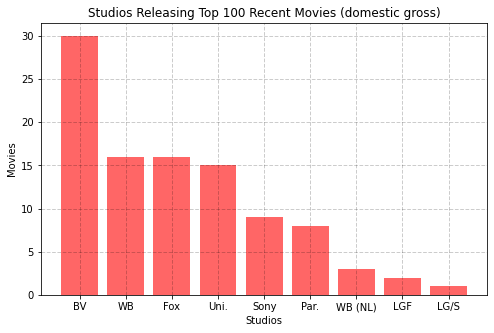

In [40]:
fig = plt.figure(figsize = (8, 5))
plt.bar(top_100dom_binned_by_studio.index, top_100dom_binned_by_studio, color = 'red', alpha = 0.60)
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Studios Releasing Top 100 Recent Movies (domestic gross)')
plt.xlabel('Studios')
plt.ylabel('Movies')

In [35]:
# Get the top 100 recent movies in dataset measured by worldwide gross
top_100ww_df = bom_ww_gross_recent_df.nlargest(100, 'worldwide_gross')
top_100ww_df.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
1875,Avengers: Age of Ultron,BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
2758,Star Wars: The Last Jedi,BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"
3081,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00"
2759,Beauty and the Beast (2017),BV,"504,000,000.00","759,500,000.00",2017,"1,263,500,000.00"


In [36]:
print(top_100ww_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1875 to 3101
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            100 non-null    object 
 1   studio           100 non-null    object 
 2   domestic_gross   100 non-null    float64
 3   foreign_gross    100 non-null    float64
 4   year             100 non-null    int64  
 5   worldwide_gross  100 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 5.5+ KB
None


In [38]:
# what studios made these movies?
top_100ww_binned_by_studio = top_100ww_df.groupby('studio')['title'].count()
top_100ww_binned_by_studio.sort_values(ascending=False, inplace=True)

Text(0, 0.5, 'Movies')

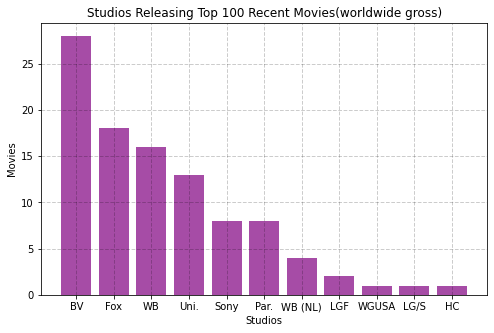

In [42]:
fig = plt.figure(figsize = (8, 5))
plt.bar(top_100ww_binned_by_studio.index, top_100ww_binned_by_studio, color = 'purple', alpha = 0.70)
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Studios Releasing Top 100 Recent Movies(worldwide gross)')
plt.xlabel('Studios')
plt.ylabel('Movies')

Studios that released Top Domestic and Worldwide grossing movies

In [43]:
top_100dom_binned_by_studio.index.intersection(top_100ww_binned_by_studio.index)

Index(['BV', 'WB', 'Fox', 'Uni.', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'LG/S'], dtype='object', name='studio')

Studios that released Top Worldwide grossing movies that were not included in top Domestic

In [44]:
top_100ww_binned_by_studio.index.difference(top_100dom_binned_by_studio.index)

Index(['HC', 'WGUSA'], dtype='object', name='studio')

# Conclusions


* __11 studios are the ones to watch in the current movie industry.__  Buenua Vista (BV), Warner Brothers (WB), Fox, Universal (Uni). Sony, Paramount (Par.) Warner Brothers/New Line (NL), Lions Gate Films (LGF), LG/S, HC, and Well Go USA Entertainment (WGUSA) are the studios to consider Worthy Rivals. Recommend that Microsoft Movie Studio prioritize competitor-focused research on these studios.


# Next Steps/Future Work

* __Explore International market by Regions.__ Box Office Mojo appears to have datasets on International gross box-office revenue by Region. It would be worth-while to research if such data is available so that the client can produce content with specific Regions mind and identity Worthy International Rivals by Region.
* __Procure more data from BOM with both domestic and foreign gross.__ The final dataset I end up with is small (966 movies). I would like to follow the same steps but on a larger dataset from Box Office Mojo that contains more domestic and foreign gross data.